# *Optimal Control Problem*

Control $u(t)$ defined in $t\in[a,b]$.

Linear Dynamics:
\begin{equation}
\left\{\begin{split}
x'= F_1(t,x,y,u) = y\\
y'= F_2(t,x,y,u) = u  
\end{split}\right.
 \end{equation}
with initial condition
$$x(0)=2, y(0)=2.$$

*Objetive function:* $$J(u) = \displaystyle\max_{t\ \in\ [a,b]} x_u+y_u$$

*Optimization problem:*
\begin{equation}
\begin{split}
\displaystyle\min_{u\in\mathrm{U}} J(u)\\
\|u\|\leq 1,
\end{split}
 \end{equation}

where $\mathrm{U}$ is the set of admissible controls.

### *Euler's Method*

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt


def Euler_Sistemas(f1,f2,u,a,b,x0,y0,n):
# Método de Euler para aproximar la solución de un PVI
# ENTRADA
    # f1 : nombre función que define la EDO x’=f1(t,y)
    # f2 : nombre función que define la EDO y’=f2(t,y)
    # a,b : extremos del intervalo [a,b]
    # x0 : condición inicial x(t0)=x0
    # y0 : condición inicial y(t0)=y0
    # n : número de pasos
# SALIDA
    # t : vector de abscisas
    # x : vector de ordenadas
    # y : vector de ordenadas

    #print('Método de Euler')
    #print('k ----  tk  ----  yk ')

#Definimos el paso
    h = (b-a)/n;
#Definimos la partición del intervalo [a,b]
    t = np.arange(a,b,h);
#Llamammos a la condición inicial:
    X = np.zeros(len(t))
    Y = np.zeros(len(t))
    X[0] = x0;
    Y[0] = y0;
    #print(0, t[0],X[0],Y[0])

    for k in range(n-1):
        X[k+1] = X[k] + h*f1(t[k],X[k],Y[k],u[k]);
        Y[k+1] = Y[k] + h*f2(t[k],X[k],Y[k],u[k]);
        #print(k, t[k+1],X[k+1],Y[k+1]);

    #print(f'Tamaño del paso: ',{h});
    #print(f'Número de pasos: ',{n});
    return t, X, Y

### *Discretization in time using Euler's Method*

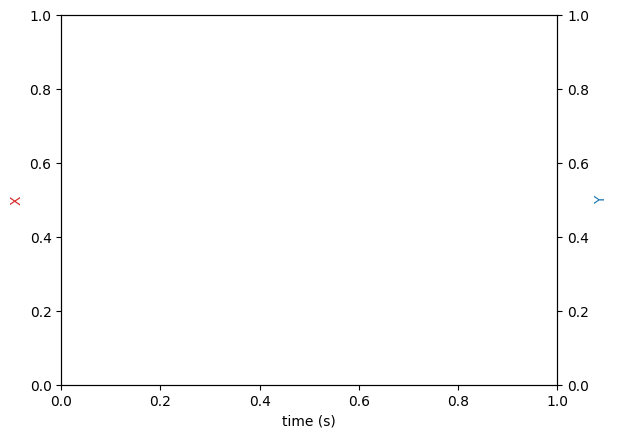

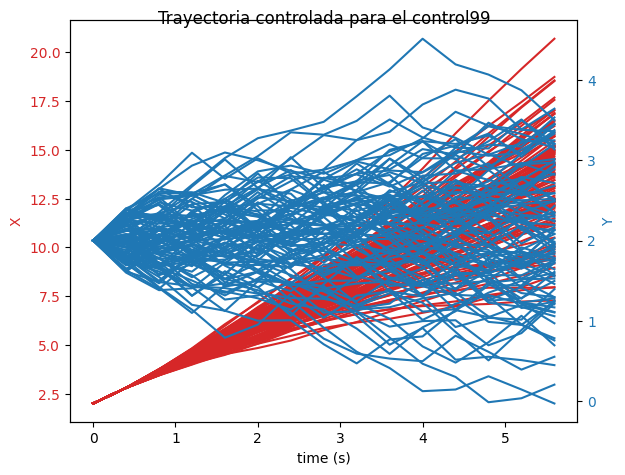

In [17]:
#Control u(t) defined in [a,b]. Linear Dynamics:
# x'= F1(t,x,y,u) = y
# y'= F2(t,x,y,u) = u
# x0=x(0), y0=y(0) initial condition

#Objetive function: J(u)=max{x_u,y_u}, t in [a,b]

#Optimization problem: min J(u), u in U =: set of admissible controls

a, b = 0, 6
x0, y0 = 2, 2
number_of_steps = 15 # Number of steps for discretization
number_of_points = 100 # Number of elements in training set

#We define the function f in the objective function

def fmax(x,y):
  return x+y

#We define the dynamics of the problem

def F1(t,x,y,u):
        return y

def F2(t,x,y,u):
        return u

# Create a list that contains distincts (secctionally constant) controls
u1 = [np.random.uniform(-1, 1, number_of_steps) for j in range(number_of_points)]

list_of_Xsolutions = []
list_of_Ysolutions = []
list_of_ObjFun = []

for u in u1:

    t, x, y = Euler_Sistemas(F1,F2,u,a,b,x0,y0,number_of_steps);
    list_of_Xsolutions.append(x);
    list_of_Ysolutions.append(y);
    list_of_ObjFun.append(np.max(fmax(x,y)));


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('X', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Y', color=color)  # we already handled the x-label with ax1


fig, ax1 = plt.subplots()
colorX = 'tab:red'
colorY = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('X', color=colorX)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Y', color=colorY)  # we already handled the x-label with ax1
#plt.plot(t,list_of_Xsolutions[i],'b+',t,list_of_Ysolutions[i],'rx',label=f'respect control {i+1}')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

for i in range(len(u1)):
    ax1.plot(t, list_of_Xsolutions[i], color=colorX);
    ax1.tick_params(axis='y', labelcolor=colorX);
    ax2.plot(t,list_of_Ysolutions[i], color=colorY);
    ax2.tick_params(axis='y', labelcolor=colorY);
    plt.suptitle('Trayectoria controlada para el control{}'.format(i));
    plt.draw()
    #plt.waitforbuttonpress();
plt.show()





### *Create the training set from the dynamics*

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


x_train1 = [torch.from_numpy(u) for u in u1]
y_train = torch.from_numpy(np.array(list_of_ObjFun)).unsqueeze(dim=1)

# Convert data to PyTorch tensors
x_train_tensor = [torch.tensor(x1, dtype=torch.float32, requires_grad=True) for x1 in x_train1]
#x_train_tensor = [torch.tensor(x1, requires_grad=True) for x1 in x_train1]
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

test_inputs = torch.stack(x_train_tensor,dim=0)


### *Create and train Neural Network with ReLu activation function.*

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

end = 5
step = 0.9

dimension_of_hiddenLayer = 75
size_output_NeuralNetwork =  1



# Convert data to PyTorch tensors
#x_train_tensor = torch.tensor(x_train, dtype=torch.float32, requires_grad=True)
#y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define the neural network with sigmoid activation
class NeuralNetReLU(nn.Module):
    def __init__(self):
        super(NeuralNetReLU, self).__init__()
        self.fc1 = nn.Linear(number_of_steps, dimension_of_hiddenLayer)  # Linear layer
        self.ReLU = nn.ReLU()  # ReLU activation
        self.fc2 = nn.Linear(dimension_of_hiddenLayer, size_output_NeuralNetwork)  # Linear layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.ReLU(x)
        x = self.fc2(x)
        return x

# Initialize the network
netVA = NeuralNetReLU()

# Define loss function and optimizer
criterion = nn.MSELoss() #Minimum Square Error
optimizer = optim.SGD(netVA.parameters(), lr=0.01) #Stochastic Gradient Descent


# Training loop

num_epochs = 1000

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = netVA(test_inputs)
    #print(outputs)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



In [20]:
# Compute gradients of the predicted function with respect to data
predicted_values = netVA(test_inputs)
gradients = torch.autograd.grad(predicted_values, x_train_tensor, grad_outputs=torch.ones_like(predicted_values), retain_graph=True)
#print(gradients)

### *Find the optimal solution of the optimization problem with armijo's method and considering gradient directions from `torch.autograd()`*

In [21]:
def armijo_line_search(func,gradient, x, direction, alpha=0.3, beta=0.8, max_iter=100):
    t = 1.0
    if torch.is_tensor(x):

      for _ in range(max_iter):
          new_x = x + t * direction
          func_value = func(x)
          #output.backward()
          #gradient = x.grad
          new_func_value = func(new_x)
          #print(type(new_func_value))
          sufficient_decrease = alpha * t * torch.dot(gradient, direction)

          #NewFuncValue = new_func_value.detach().numpy()

          if new_func_value.detach().numpy() <= (func_value + sufficient_decrease).detach().numpy():
              return t
          t *= beta


    else:
        for _ in range(max_iter):
          new_x = x + t * direction
          func_value = func(x)
          new_func_value = func(new_x)
          sufficient_decrease = alpha * t * gradient(x).dot(direction)

          if new_func_value <= func_value + sufficient_decrease:
              return t
          t *= beta

    return t

def gradient_descent_armijo(func, initial_point, max_iterations=1000, tolerance=1e-6):

    if torch.is_tensor(initial_point):
        x = initial_point

        for iteration in range(max_iterations):
            func_value = func(x)
            func_value.backward()
            gradient = x.grad #+ 2*(1e-6)*x
            direction = -gradient

            with torch.no_grad(): #Not Update with Autograd
                step_size = armijo_line_search(func, gradient, x, direction)
                x += step_size * direction


                # Calculate the L2 (Euclidean) norm of the tensor
                if torch.sqrt(torch.dot(gradient, direction)) < tolerance:
                    break



    else:
        x = initial_point.copy()

        for iteration in range(max_iterations):
            direction = -gradient(x)
            step_size = armijo_line_search(func, gradient, x, direction)
            x += step_size * direction

            if np.linalg.norm(gradient(x)) < tolerance:
              break

    return x


# Example usage

x_point1 = torch.rand(number_of_steps,requires_grad=True,dtype=torch.float32)

optimal_point = gradient_descent_armijo(netVA, x_point1, max_iterations=1000, tolerance=1e-6)

print("Optimal point:", optimal_point)
print("Optimal value:", netVA(optimal_point).item())

Optimal point: tensor([-1.9489, -1.6884, -2.0576, -1.0967, -1.3897, -1.0757, -1.1923, -1.2763,
        -1.1713, -0.2702, -0.4482, -0.0474,  0.2686,  0.0907,  0.8942],
       requires_grad=True)
Optimal value: 4.501593112945557


In [15]:
reset()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  (), please run `%reset?` for details
